In [3]:
"""Library and Data Imports"""
import tensorflow as tf
CUDA_VISIBLE_DEVICES=""
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
"""One hot encode the sequences"""

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Split into Test/Train

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


    
    

In [5]:
"""Building the Network"""
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

2022-08-24 11:27:00.548935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-24 11:27:00.549027: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-24 11:27:00.549067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-24 11:27:00.549105: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-24 11:27:00.549141: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [6]:
"""Training the Model"""
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 2.5913 - accuracy: 0.5435 - val_loss: 1.6853 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3664 - accuracy: 0.7182 - val_loss: 1.2727 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0197 - accuracy: 0.7815 - val_loss: 1.1133 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8019 - accuracy: 0.8286 - val_loss: 1.0215 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6438 - accuracy: 0.8627 - val_loss: 0.9654 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5192 - accuracy: 0.8903 - val_loss: 0.9123 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.4250 - accuracy: 0.9079 - val_loss: 0.9040 - val_accuracy: 0.8110
Epoch 8/20
16

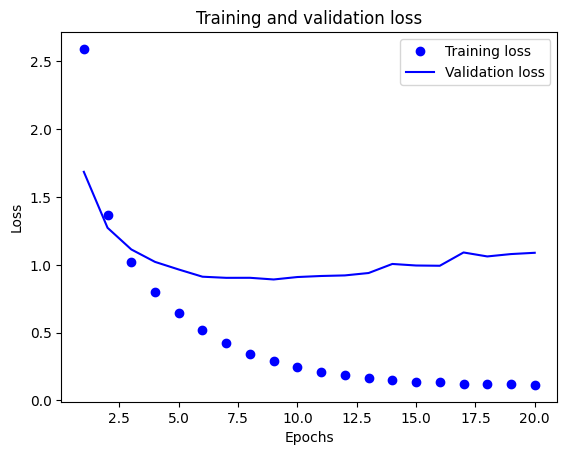

In [7]:
"""Plotting Results"""
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
"""Rebuilding model to prevent overfitting at 9 Epochs"""
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.fit(partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Epoch 1/9
16/16 [==============================] - 1s 17ms/step - loss: 2.6521 - accuracy: 0.5355 - val_loss: 1.7597 - val_accuracy: 0.6560
Epoch 2/9
16/16 [==============================] - 0s 12ms/step - loss: 1.4129 - accuracy: 0.7061 - val_loss: 1.3006 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 11ms/step - loss: 1.0337 - accuracy: 0.7806 - val_loss: 1.1233 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 0s 11ms/step - loss: 0.8077 - accuracy: 0.8321 - val_loss: 1.0123 - val_accuracy: 0.7980
Epoch 5/9
16/16 [==============================] - 0s 11ms/step - loss: 0.6382 - accuracy: 0.8673 - val_loss: 0.9535 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 0s 11ms/step - loss: 0.5160 - accuracy: 0.8925 - val_loss: 0.9207 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 11ms/step - loss: 0.4109 - accuracy: 0.9122 - val_loss: 0.8961 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

[1.0046318769454956, 0.7813891172409058]

In [17]:
"""Predict Test"""
predictions = model.predict(x_test)
predicted = predictions.argmax(axis=1)
print(predicted)

71/71 [==============================] - 0s 1ms/step
[3 1 1 ... 3 4 1]


In [18]:
"""Confusion Matrix"""
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_labels, predicted)

